In [18]:
from choquet_integral import *
import numpy as np
import itertools
import math
import inspect
import matplotlib.pyplot as plt
import csv
import sklearn.metrics as metrics
from sklearn import datasets
from sklearn.preprocessing import scale
import pandas
from pyclustertend import vat, ivat
import matplotlib.pyplot as plt
from emd_clustertend import *
import scipy.io as sio

In [4]:
# our integral
chi = ChoquetIntegral()

# load the training file 
# 02.txt: https://github.com/aminb99/remote-sensing-nn-datasets/blob/master/AID_4net_dataset/NNFold_1/Fold_1/test/02.txt
# _02.txt: https://github.com/aminb99/remote-sensing-nn-datasets/blob/master/AID_dataset/NNFold_1/Fold_1/test/02.txt
df = pandas.read_csv('02.txt')
df

# how many nets? 
n = 4 # 7

In [5]:
# suck out labels and data
training_labels = np.asarray( df.values )[:,n]
training_data = np.asarray( df.values )[:,0:n]

In [6]:
# for class ?, make this a binary learning problem
locs = np.where(training_labels == 1)
print(locs)
labels = np.zeros(training_labels.shape)
labels[locs] = 1

(array([  0,   8,   9,  69,  76, 105, 138, 190, 200, 221, 227, 248, 342,
       352, 383, 411, 442, 484, 612, 633, 780, 807, 876, 901, 912, 925,
       950, 965, 971], dtype=int64),)


In [7]:
# train the integral
chi.train_chi(training_data.transpose(), labels)
print(chi.fm)

Number Inputs :  4 ; Number Samples :  999
     pcost       dcost       gap    pres   dres
 0: -2.8841e+01 -3.6231e+01  5e+01  6e+00  2e-01
 1: -2.8986e+01 -3.4405e+01  6e+00  2e-01  6e-03
 2: -2.8982e+01 -2.9190e+01  2e-01  5e-03  1e-04
 3: -2.8994e+01 -2.9014e+01  2e-02  2e-04  6e-06
 4: -2.8999e+01 -2.9001e+01  2e-03  2e-06  6e-08
 5: -2.8999e+01 -2.9000e+01  2e-04  1e-07  3e-09
 6: -2.9000e+01 -2.9000e+01  2e-05  1e-09  3e-11
Optimal solution found.
{'[1]': 0.007301042070360983, '[2]': 3.168038462656342e-05, '[3]': 0.0001580437632328804, '[4]': 0.004358436395386026, '[1 2]': 0.12177233024679085, '[1 3]': 0.4984426657599827, '[1 4]': 0.2860080931753677, '[2 3]': 0.0005748642723022515, '[2 4]': 0.99134681393906, '[3 4]': 0.9097324736104253, '[1 2 3]': 0.9940898513618791, '[1 2 4]': 0.9987471770458044, '[1 3 4]': 0.9956525757188976, '[2 3 4]': 0.9999609819692074, '[1 2 3 4]': 1.0}


In [8]:
#distance matrix code from Matt
initial = []
for i in range(n):
    initial.append(i+1)
    
a = itertools.permutations(initial,n)
b = np.ndarray((math.factorial(n),n),dtype=int)
c = np.ndarray((math.factorial(n),n),dtype=float)
for i,val in enumerate(a):
    b[i] = np.asarray(val)
    
    c_build = np.ndarray(n)
    for j in range(len(b[i])):
        if j == 0:
            c_build[j] = chi.fm[str(b[i][0:1])]
        else:
            c_build[j] = (chi.fm[str(np.sort(b[i][0:j+1]))]) - (chi.fm[str(np.sort(b[i][0:j]))])

    c[i] = c_build

In [20]:
C = c
remote_dis = emd_pairwise_dissimilarity(chi.generate_walk_diffs())
mat_dict = {}
mat_dict['remote_dis'] = remote_dis
sio.savemat("remote_mat.mat",mat_dict)
# b = vat(C, return_ODM=True)
# a = ivat(C, return_D_prim=True)

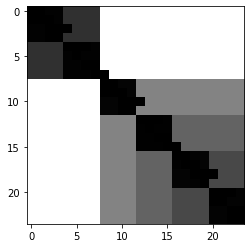

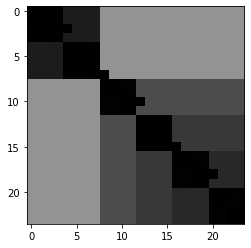

In [22]:
# I want to plot it

#vat
plt.figure()
color_map = plt.imshow(a)
color_map.set_cmap("gray")
#plt.colorbar()

#ivat - dang, an't as straight forward due to transform (I will have to think about!)
plt.figure()
color_map = plt.imshow(a,vmin=0,vmax=1)
color_map.set_cmap("gray")

In [23]:
# find the unique sorts
sortorder = np.argsort( (-1) * training_data )
print(sortorder)
unique_rows = np.unique(sortorder, axis=0)
print(unique_rows)
Nunique = unique_rows.shape[0]
print(Nunique)

[[1 2 3 0]
 [0 1 2 3]
 [0 1 2 3]
 ...
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 1 2 3]
 [0 1 3 2]
 [0 2 1 3]
 [0 3 1 2]
 [1 0 2 3]
 [1 2 0 3]
 [1 2 3 0]
 [1 3 0 2]
 [1 3 2 0]
 [2 0 1 3]
 [2 3 0 1]
 [2 3 1 0]
 [3 0 1 2]
 [3 1 0 2]
 [3 2 0 1]]
15


In [24]:
#distance matrix on just unique sorts
d = np.ndarray((Nunique,n),dtype=float)
for i in range(Nunique):
    b = np.asarray(unique_rows[i]) + 1
    c_build = np.zeros(n)
    for j in range(n):
        if j == 0:
            c_build[j] = chi.fm[str(b[0:1])]
        else:
            c_build[j] = (chi.fm[str(np.sort(b[0:j+1]))]) - (chi.fm[str(np.sort(b[0:j]))])
    d[i] = c_build

In [25]:
# what are these operators? plot them out
np.set_printoptions(formatter={'float': '{: 0.9f}'.format})
for i in range(Nunique):
    print(d[i])

[ 0.007301042  0.114471288  0.872317521  0.005910149]
[ 0.007301042  0.114471288  0.876974847  0.001252823]
[ 0.007301042  0.491141624  0.495647186  0.005910149]
[ 0.007301042  0.278707051  0.712739084  0.001252823]
[ 0.000031680  0.121740650  0.872317521  0.005910149]
[ 0.000031680  0.000543184  0.993514987  0.005910149]
[ 0.000031680  0.000543184  0.999386118  0.000039018]
[ 0.000031680  0.991315134  0.007400363  0.001252823]
[ 0.000031680  0.991315134  0.008614168  0.000039018]
[ 0.000158044  0.498284622  0.495647186  0.005910149]
[ 0.000158044  0.909574430  0.085920102  0.004347424]
[ 0.000158044  0.909574430  0.090228508  0.000039018]
[ 0.004358436  0.281649657  0.712739084  0.001252823]
[ 0.004358436  0.986988378  0.007400363  0.001252823]
[ 0.004358436  0.905374037  0.085920102  0.004347424]


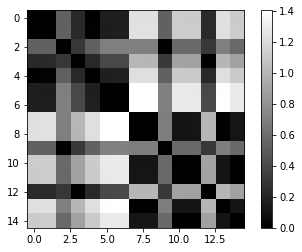

In [26]:
#dissimilarity matrix, i want to see it unsorted
pwd = metrics.pairwise_distances(d,metric='euclidean')
color_map = plt.imshow(pwd)
color_map.set_cmap("gray")
plt.colorbar()

In [27]:
remote_dis = emd_pairwise_dissimilarity(d)
mat_dict = {}
mat_dict['remote_dis'] = remote_dis
sio.savemat("remote_mat.mat",mat_dict)

In [ ]:
# vat and ivat on just the seen walks
C = d
b = vat(C, return_ODM=True)
a = ivat(C, return_D_prim=True)

In [ ]:
print(d)
# naive extraction
ListOfOps = np.asarray([0])
Thresh = 0.1
for i in range(1,Nunique):
    dist = np.zeros( ListOfOps.shape[0] )
    for j in range(ListOfOps.shape[0]):
        dist[j] = np.sqrt(np.sum(np.power(d[i]-d[ListOfOps[j]],2.0)))
    # new...?
    # look at the thing that its closest to, is it greater than some threshold?
    if( np.amin(dist) > Thresh ):
        ListOfOps = np.append(ListOfOps,i)
# here are our operators ...
print(ListOfOps)
print(d[ListOfOps])